Sample taken from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

This forecast of a shampoo sales and demostrate how ARIMA is done in python

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.  
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.  
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.  
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:  

p: The number of lag observations included in the model, also called the lag order.  
d: The number of times that the raw observations are differenced, also called the degree of differencing.  
q: The size of the moving average window, also called the order of moving average.  

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


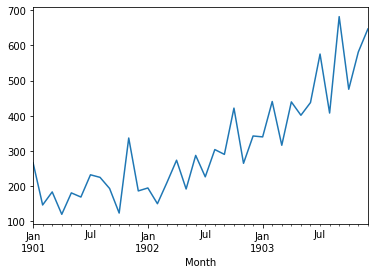

In [7]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('../input/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

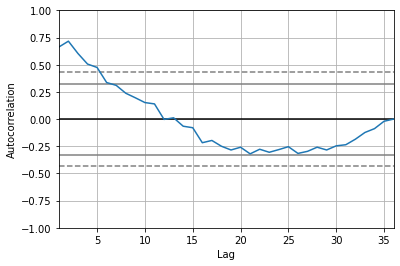

In [5]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

/Users/tony/Workspaces/csda-lab/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/tony/Workspaces/csda-lab/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 17 Jun 2020   AIC                            406.340
Time:                        14:01:32   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
         

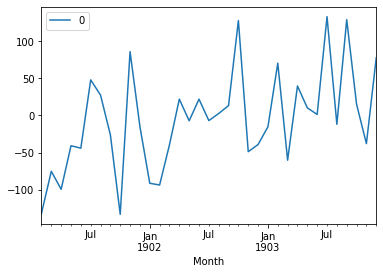

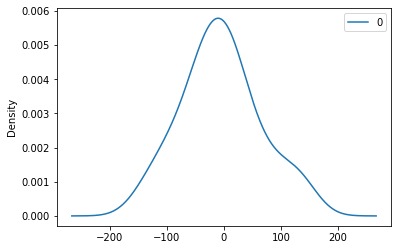

0
count   35.000000
mean    -5.495114
std     68.132888
min   -133.296509
25%    -42.477774
50%     -7.186445
75%     24.748451
max    133.238079


In [8]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [9]:
## Rolling Forecast ARIMA Model

predicted=349.117690, expected=342.300000
predicted=306.512896, expected=339.700000
predicted=387.376387, expected=440.400000
predicted=348.154184, expected=315.900000
predicted=386.308833, expected=439.300000
predicted=356.082057, expected=401.300000
predicted=446.379531, expected=437.400000
predicted=394.737297, expected=575.500000
predicted=434.915508, expected=407.600000
predicted=507.923489, expected=682.000000
predicted=435.482952, expected=475.300000
predicted=652.743786, expected=581.300000
predicted=546.343459, expected=646.900000
Test MSE: 6958.324


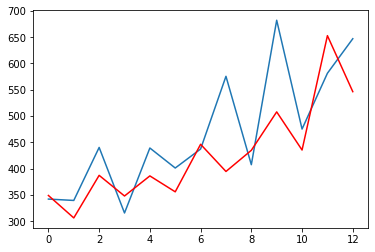

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()